In [1]:
using Pkg
Pkg.activate("../")
Pkg.instantiate()

  Activating project at `~/Documents/OptimalCluster.jl`


In [2]:
using OptimalCluster
using CSV, DataFrames, LinearAlgebra

# Load data
data = CSV.read("donut3.csv", DataFrame)

n = size(data, 1)
X = Matrix(data[:, 1:2])
distances = [norm(X[i, :] - X[j, :]) for i in 1:n, j in 1:n]

# Data
data = OptimalCluster.HomogeneousCluster.ClusterProblemData(n, n, 3, distances)

OptimalCluster.HomogeneousCluster.ClusterProblemData(999, 999, 3, [0.0 0.0344145153823209 … 0.06889185999085813 0.06823208888785395; 0.0344145153823209 0.0 … 0.04810509249549367 0.04835040302830992; … ; 0.06889185999085813 0.04810509249549367 … 0.0 0.0018867445508069676; 0.06823208888785395 0.04835040302830992 … 0.0018867445508069676 0.0])

In [ ]:
using JuMP

model = OptimalCluster.HomogeneousCluster.jump_formulation(data)
optimize!(model)

obj_value = objective_value(model)
obj_value 

In [29]:
initial_u = zeros(n)
x, S_u = OptimalCluster.HomogeneousCluster.lagrangian(initial_u, data)

n_steps = 50
lower_bound = 40
ϵ = 1

μ = 50
ρ = 0.9

u, results = OptimalCluster.HomogeneousCluster.subgradient_algorithm(initial_u, data, 0.1, n_steps, lower_bound, ϵ)
u_2, results_2 = OptimalCluster.HomogeneousCluster.subgradient_algorithm(initial_u, data, 0.1, n_steps, μ,  ρ)

([0.02688083257165034, 0.02688083257165034, 0.02688083257165034, 0.01610423173048963, 0.01610423173048963, 0.01610423173048963, 0.01610423173048963, 0.05956578941440829, 0.026200880326826707, 0.01610423173048963  …  0.07399111835055197, 0.07399111835055197, 0.07399111835055197, 0.07399111835055197, 0.07399111835055197, 0.07399111835055197, 0.07399111835055197, 0.07399111835055197, 0.07399111835055197, 0.07399111835055197], Any[0.0, 13.115713827594384, -3.5798077019997407, 14.931009542056554, 15.161452296058101, 18.7333657870431, 4.853624568746135, 8.108584327490576, 17.517518146675144, 15.49886941019779  …  16.583758327758318, 16.871874656532444, 6.137403128054686, 6.414575557232389, 16.73720044152143, 16.183993693684762, 7.503737852352451, 7.597523356373088, 16.242955028698553, 15.438691119062623])

In [23]:
results

50-element Vector{Any}:
  0.0
 13.085593345666698
 -0.13765584085538052
 18.212540429512003
 22.384738171316616
 22.465648353672734
 16.757026844691417
 15.965002755895966
 21.67023968892134
 22.15826071573637
  ⋮
 20.951174928204733
 17.13801928252015
 15.660525915335977
 22.020696411552947
 21.08143125887961
 16.24777012364251
 15.585755835373732
 21.912323098550445
 21.708782517180563

In [30]:
results_2

50-element Vector{Any}:
  0.0
 13.115713827594384
 -3.5798077019997407
 14.931009542056554
 15.161452296058101
 18.7333657870431
  4.853624568746135
  8.108584327490576
 17.517518146675144
 15.49886941019779
  ⋮
 16.871874656532444
  6.137403128054686
  6.414575557232389
 16.73720044152143
 16.183993693684762
  7.503737852352451
  7.597523356373088
 16.242955028698553
 15.438691119062623

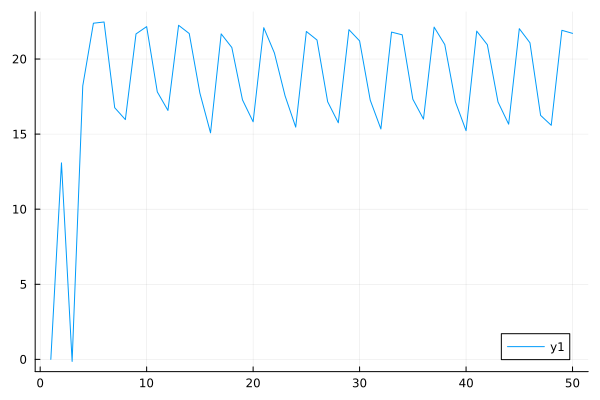

In [32]:
using Plots

plot(results)

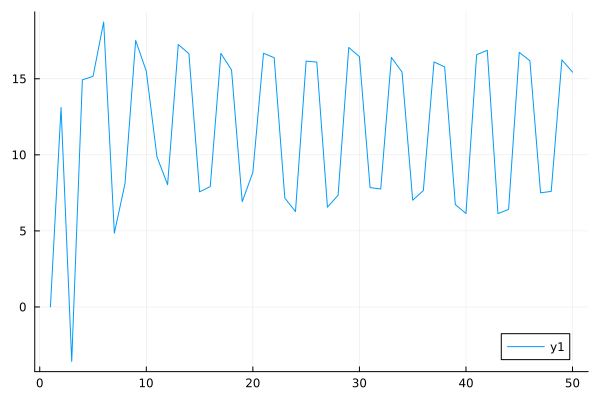

In [31]:
plot(results_2)